In [5]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR 
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score

In [6]:
data = pd.read_csv('../Files tcc/data.csv',index_col=['Data'])
data.head()

,Fechamento
Data,
01-01-2015,314.25
02-01-2015,315.03
03-01-2015,281.08
04-01-2015,264.20
05-01-2015,274.47


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

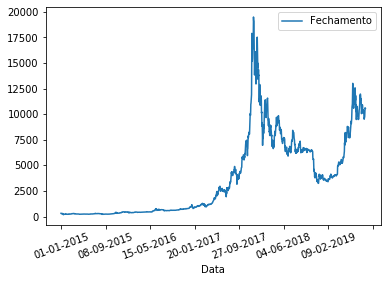

In [7]:
data.plot()
plt.xticks(rotation=20)

In [8]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')

In [9]:
escalonador = MinMaxScaler(feature_range=(0,1))
dataset = escalonador.fit_transform(dataset)

In [10]:
train_size = int(len(dataset)*0.67)
teste_size = len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))

1145 564


In [11]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [12]:
look_back=3
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test,look_back=look_back)

In [13]:
svr_rbf = SVR(C=4,epsilon=0, gamma='auto')
svr_lin = SVR(kernel='linear',C=5, degree=3, epsilon=0, gamma='auto')
svr_poly = SVR(kernel='poly', C=18, gamma='scale', degree=3, epsilon=0.1,coef0=1)
svr_sgm = SVR(kernel='sigmoid',C=1,epsilon=0.1,gamma='auto',coef0=1)
svr_pre= SVR(kernel='precomputed',C=1,epsilon=0.1)

In [14]:
svr_rbf.fit(trainX,trainY)
predicaorbf = svr_rbf.predict(testX)

In [15]:
svr_poly.fit(trainX,trainY)
predicaopoly = svr_poly.predict(testX)

In [16]:
svr_lin.fit(trainX,trainY)
predicaolin = svr_lin.predict(testX)

In [17]:
svr_sgm.fit(trainX,trainY)
predicaosgm=svr_sgm.predict(testX)

In [18]:
testY = np.reshape(testY,(560,1))
predicaorbf = np.reshape(predicaorbf,(560,1))
predicaopoly = np.reshape(predicaopoly,(560,1))
predicaolin = np.reshape(predicaolin,(560,1))
predicaosgm = np.reshape(predicaosgm,(560,1))
testY = escalonador.inverse_transform(testY)
predicaorbf = escalonador.inverse_transform(predicaorbf)
predicaopoly = escalonador.inverse_transform(predicaopoly)
predicaolin = escalonador.inverse_transform(predicaolin)
predicaosgm = escalonador.inverse_transform(predicaosgm)

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

RBF
MAPE: 96.952
Desvio: 3.048
MSE: 112383.521
RMSE: 335.237
MAE: 222.491
MSLE: 0.002
R2 score: 0.980
Explaine Variance Score: 0.983


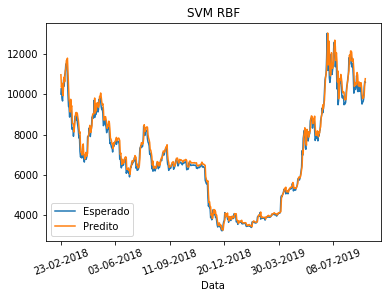

In [20]:
print('RBF')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicaorbf)))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,predicaorbf))
print("MSE: %.3f"%mean_squared_error(testY,predicaorbf))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicaorbf)))
print("MAE: %.3f"%mean_absolute_error(testY,predicaorbf))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicaorbf))
print("R2 score: %.3f"%r2_score(testY,predicaorbf))
print("Explaine Variance Score: %.3f"%explained_variance_score(testY,predicaorbf))
resultado1 = pd.DataFrame(testY,columns=['Esperado'])
resultado1['Predito'] = predicaorbf
resultado1.index = data.tail(560).index
resultado1.plot()
plt.xticks(rotation=20)
plt.title('SVM RBF')
plt.savefig('SVM RBF.png')   

Linear
MAPE: 97.376
Desvio: 2.624
MSE: 93574.716
RMSE: 305.900
MAE: 192.928
MSLE: 0.001
R2 score: 0.983
Explaine Variance Score: 0.983


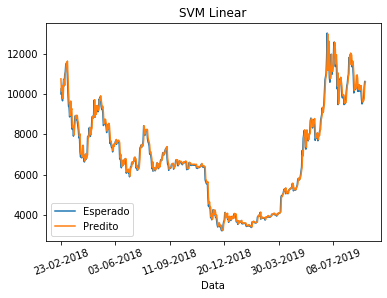

In [21]:
print('Linear')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicaolin)))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,predicaolin))
print("MSE: %.3f"%mean_squared_error(testY,predicaolin))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicaolin)))
print("MAE: %.3f"%mean_absolute_error(testY,predicaolin))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicaolin))
print("R2 score: %.3f"%r2_score(testY,predicaolin))
print("Explaine Variance Score: %.3f"%explained_variance_score(testY,predicaolin))
resultado2 = pd.DataFrame(testY,columns=['Esperado'])
resultado2['Predito'] = predicaolin
resultado2.index = data.tail(560).index
resultado2.plot()
plt.xticks(rotation=20)
plt.title('SVM Linear')
plt.savefig('SVM Linear.png')  

Poly
MAPE: 95.141
Desvio: 4.859
MSE: 185423.480
RMSE: 430.608
MAE: 316.348
MSLE: 0.004
R2 score: 0.967
Explaine Variance Score: 0.967


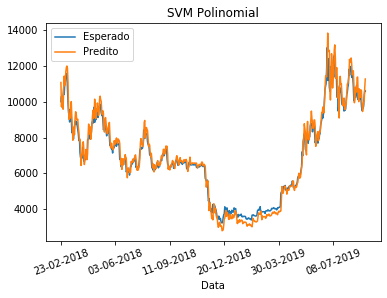

In [22]:
print('Poly')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicaopoly)))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,predicaopoly))
print("MSE: %.3f"%mean_squared_error(testY,predicaopoly))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicaopoly)))
print("MAE: %.3f"%mean_absolute_error(testY,predicaopoly))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicaopoly))
print("R2 score: %.3f"%r2_score(testY,predicaopoly))
print("Explaine Variance Score: %.3f"%explained_variance_score(testY,predicaopoly))
resultado3 = pd.DataFrame(testY,columns=['Esperado'])
resultado3['Predito'] = predicaopoly
resultado3.index = data.tail(560).index
resultado3.plot()
plt.xticks(rotation=20)
plt.title('SVM Polinomial')
plt.savefig('SVM Polinominal.png')  

Sigmoid
MAPE: 29.167
Desvio: 70.833
MSE: 20372242.982
RMSE: 4513.562
MAE: 4106.270
MSLE: 0.457
R2 score: -2.659
Explaine Variance Score: -1.855


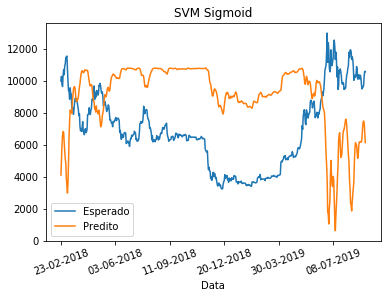

In [23]:
print('Sigmoid')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicaosgm)))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,predicaosgm))
print("MSE: %.3f"%mean_squared_error(testY,predicaosgm))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicaosgm)))
print("MAE: %.3f"%mean_absolute_error(testY,predicaosgm))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicaosgm))
print("R2 score: %.3f"%r2_score(testY,predicaosgm))
print("Explaine Variance Score: %.3f"%explained_variance_score(testY,predicaosgm))
resultado4 = pd.DataFrame(testY,columns=['Esperado'])
resultado4['Predito'] = predicaosgm
resultado4.index = data.tail(560).index
resultado4.plot()
plt.xticks(rotation=20)
plt.title('SVM Sigmoid')
plt.savefig('SVM Sigmoid.png')  

In [24]:
entrada = np.array([[7463.11,7761.24,7569.63]])
fechamentohoje = [7424.29]

MAPE: -0.001
Desvio: 100.001
RMSE: 7424.401
Fechamento [7424.29]
Predito [-0.11061184]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

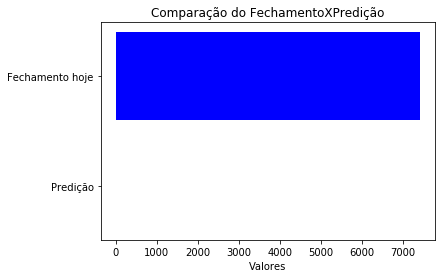

In [32]:
predicaohoje2 = svr_sgm.predict(entrada)
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje2)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje2))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje2)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje2)

vetorgrafico = { "Predição": predicaohoje2[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')

MAPE: -303487368.480
Desvio: 303487468.480
RMSE: 22531789773.602
Fechamento [7424.29]
Predito [-2.25317823e+10]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

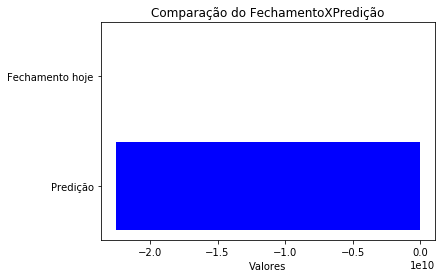

In [31]:
predicaohoje3 = svr_poly.predict(entrada)
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje3)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje3))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje3)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje3)

vetorgrafico = { "Predição": predicaohoje3[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')

MAPE: 0.003
Desvio: 99.997
RMSE: 7424.092
Fechamento [7424.29]
Predito [0.19802537]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

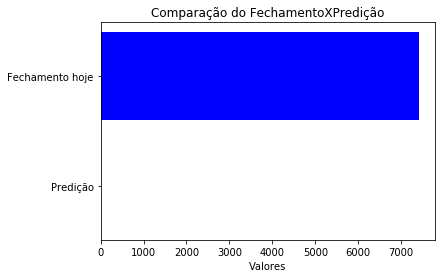

In [30]:
predicaohoje4 = svr_rbf.predict(entrada)
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje4)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje4))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje4)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje4)

vetorgrafico = { "Predição": predicaohoje4[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')

MAPE: 97.822
Desvio: 2.178
RMSE: 161.720
Fechamento [7424.29]
Predito [7586.00955637]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

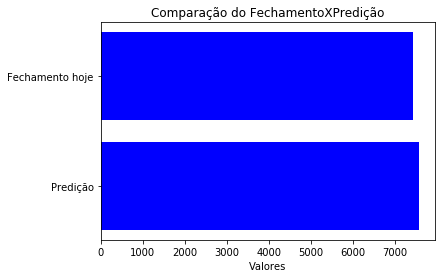

In [29]:
predicaohoje1 = svr_lin.predict(entrada)
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje1)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje1))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje1)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje1)

vetorgrafico = { "Predição": predicaohoje1[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')